**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase 9 - Cálculo diferencial, aplicado (II)**


En esta clase de **Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**, continuaremos explorando el **Cálculo diferencial, aplicado (II)**. Nos enfocaremos en conceptos clave como:

*   Recap de la aplicación de estos conceptos para encontrar puntos óptimos en modelos económicos, como la cantidad donde el **Ingreso Marginal (MR) es igual al Costo Marginal (MC)**.
*   La **Elasticidad Precio de la Demanda**, analizando tanto la formulación continua (usando derivadas) como la formulación discreta o de arco (aplicada a datos reales).
*   Trabajaremos con un caso práctico utilizando un conjunto de datos real (el dataset de aguacates) para calcular y analizar la elasticidad precio de la demanda por región.
*   Visualizaremos los resultados para entender mejor las diferencias en la sensibilidad al precio entre distintas regiones.

In [31]:
#librerias de la clase
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd


In [ ]:
#!pip install numpy, sympy,matplotlib,scipy,pandas

#Recordando
## Encontrar la cantidad donde MR = MC

Vamos a definir simbólicamente una función de demanda y una función de costo para encontrar la cantidad donde el Ingreso Marginal (MR) es igual al Costo Marginal (MC).

In [32]:
# Definir variables simbólicas
q, p, a, b, c, d = sp.symbols('q p a b c d')

def precio_demanda(q, a, b):
    return a - b*q # a es el precio maximo

def costo_total(q, c, d):
    return c*q + d*q**2

# Ingreso Total (TR = p * q)
TR = precio_demanda(q, a, b) * q

# Ingreso Marginal , la derivada del ingreso
MR = sp.diff(TR, q)

# Costo Marginal, la derivada del costo
MC = sp.diff(costo_total(q, c, d), q)

# Ecuación para encontrar la cantidad donde MR = MC
ecuacion_equilibrio = sp.Eq(MR - MC, 0) #.eq crea una ecuacion simbolica


print("Función de Ingreso Total (TR):")
display(TR)
print("\nFunción de Ingreso Marginal (MR):")
display(MR)
print("\nFunción de Costo Marginal (MC):")
display(MC)
print("\nEcuación MR - MC = 0:")
display(ecuacion_equilibrio)

# Resolver la ecuación para q
solucion_q = sp.solve(ecuacion_equilibrio, q) #ahora dada la ecuacion de equilibrio, la valuamos en q. es para obtener la ecuacion de forma simbolica

print("\nSolución para q (donde MR = MC):")
solucion_q




Función de Ingreso Total (TR):


q*(a - b*q)


Función de Ingreso Marginal (MR):


a - 2*b*q


Función de Costo Marginal (MC):


c + 2*d*q


Ecuación MR - MC = 0:


Eq(a - 2*b*q - c - 2*d*q, 0)


Solución para q (donde MR = MC):


[(a - c)/(2*(b + d))]

In [33]:
#----------------------#

valor_en_q1 = ecuacion_equilibrio.subs(q, 1) #lo valuamos en 1

display(valor_en_q1)

Resultado1 =sp.simplify(valor_en_q1)#simplificamos para interpretar

display(Resultado1)

Eq(a - 2*b - c - 2*d, 0)

Eq(a, 2*b + c + 2*d)

---

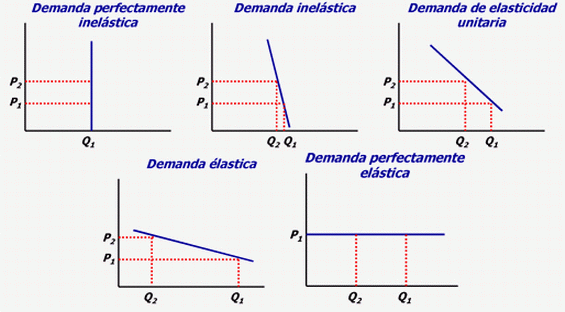

**Elasticidad Precio de la Demanda** 🤔

Piensa en esto como qué tan "sensibles" son los compradores a los cambios en el precio 🏷️ de un producto.

*   **Si la demanda es Elástica:** Si el precio sube, la cantidad demandada disminuye significativamente 📉. Esto suele ocurrir cuando hay muchos sustitutos disponibles y los consumidores pueden cambiar fácilmente a otras opciones.
*   **Si la demanda es Inelástica:** Si el precio sube, la cantidad demandada cambia muy poco 🤷‍♀️. Esto sucede a menudo con productos necesarios o cuando no hay buenos sustitutos cercanos, por lo que los consumidores siguen comprando a pesar del aumento de precio.

En resumen: Mide cuánto cambia la cantidad que la gente compra cuando cambia el precio.

## Elasticidad Precio de la Demanda (Continua)

La elasticidad precio de la demanda ($\epsilon_p$) para una función de demanda continua $Q = f(P)$ se define como:

$$ \epsilon_p = \frac{\% \Delta Q}{\% \Delta P} = \frac{\frac{dQ}{Q}}{\frac{dP}{P}} = \frac{dQ}{dP} \cdot \frac{P}{Q} $$

Donde:
- $\frac{dQ}{dP}$ es la derivada de la cantidad demandada con respecto al precio.
- $P$ es el precio.
- $Q$ es la cantidad demandada.

## Caso Hipotético: Elasticidad Precio de la Demanda (Continua)

Vamos a considerar una función de demanda lineal hipotética y calcular la elasticidad precio de la demanda en un punto específico utilizando la fórmula continua.

In [34]:
# Definir variables simbólicas
p, q = sp.symbols('p q')

def cantidad_demandada(p):
    return 1000 - 500*p

# Calculamos la derivada de Q con respecto a P
dQ_dP = sp.diff(cantidad_demandada(p), p)

print("Función de Cantidad Demandada Q(P):")
display(cantidad_demandada(p))
print("\nDerivada de la Cantidad Demandada con respecto al Precio (dQ/dP):")
display(dQ_dP)



Función de Cantidad Demandada Q(P):


1000 - 500*p


Derivada de la Cantidad Demandada con respecto al Precio (dQ/dP):


-500

In [35]:
# Ahora, calculamos la elasticidad en un punto específico, por ejemplo, cuando el precio es P = 1.5
P0 = 1.5
Q0 = cantidad_demandada(P0)

# Asegurarnos de que Q0 no sea cero para evitar división por cero
if Q0 != 0:
    # Calcular la elasticidad precio de la demanda continua en P0
    elasticidad_punto = dQ_dP * (P0 / Q0)

    print(f"\nPrecio (P0): {P0}")
    print(f"Cantidad Demandada en P0 (Q0): {Q0}")
    print(f"Elasticidad Precio de la Demanda en P = {P0}:")
    display(elasticidad_punto)

    # Interpretación
    if abs(elasticidad_punto) > 1: #abs() nos devuelve el valor absoluto de un numero
        print("\nInterpretación: La demanda es Elástica en este punto (|Ep| > 1).")
    elif abs(elasticidad_punto) < 1:
        print("\nInterpretación: La demanda es Inelástica en este punto (|Ep| < 1).")
    else:
        print("\nInterpretación: La demanda es de Elasticidad Unitaria en este punto (|Ep| = 1).")
else:
    print(f"\nLa cantidad demandada en P = {P0} es cero, no se puede calcular la elasticidad en este punto.")


Precio (P0): 1.5
Cantidad Demandada en P0 (Q0): 250.0
Elasticidad Precio de la Demanda en P = 1.5:


-3.00000000000000


Interpretación: La demanda es Elástica en este punto (|Ep| > 1).


## Rangos e Interpretación de la Elasticidad Precio de la Demanda ($\epsilon_p$)

La elasticidad precio de la demanda nos indica cuánto cambia la cantidad demandada ante un cambio en el precio. La interpretación se basa en el **valor absoluto** de $\epsilon_p$, ya que la elasticidad precio de la demanda casi siempre es negativa (debido a la ley de la demanda, que establece una relación inversa entre precio y cantidad).

*   **Demanda Elástica:** $|\epsilon_p| > 1$
    *   **Significado:** La cantidad demandada es **muy sensible** a los cambios en el precio. Un pequeño cambio porcentual en el precio provoca un cambio porcentual **mayor** en la cantidad demandada.
    *   **Implicación:** Las empresas con productos de demanda elástica suelen ser cautelosas al subir precios, ya que podrían perder una parte significativa de sus ventas.

*   **Demanda Inelástica:** $|\epsilon_p| < 1$
    *   **Significado:** La cantidad demandada es **poco sensible** a los cambios en el precio. Un cambio porcentual en el precio provoca un cambio porcentual **menor** en la cantidad demandada.
    *   **Implicación:** Las empresas con productos de demanda inelástica pueden tener más margen para ajustar precios sin que sus ventas se vean drásticamente afectadas (aunque aún existe un límite).

*   **Demanda de Elasticidad Unitaria:** $|\epsilon_p| = 1$
    *   **Significado:** La cantidad demandada cambia en el mismo porcentaje que el precio. Un cambio porcentual en el precio provoca un cambio porcentual **igual** en la cantidad demandada.

*   **Demanda Perfectamente Elástica:** $|\epsilon_p| = \infty$
    *   **Significado:** Cualquier pequeño aumento de precio provoca que la cantidad demandada caiga a cero. La demanda es infinitamente sensible al precio. (Caso teórico, a menudo asociado con competencia perfecta).

*   **Demanda Perfectamente Inelástica:** $|\epsilon_p| = 0$
    *   **Significado:** La cantidad demandada no cambia en absoluto, sin importar el cambio de precio. La demanda no es sensible al precio. (Caso teórico, a menudo asociado con bienes esenciales sin sustitutos).



---

## Elasticidad Precio de la Demanda (Discreta o Arco)

La elasticidad precio de la demanda ($\epsilon_p$) para datos discretos, a menudo llamada **elasticidad arco**, se calcula entre dos puntos $(P_1, Q_1)$ y $(P_2, Q_2)$ utilizando el método del punto medio para evitar sesgos. La fórmula es:

$$ \epsilon_p = \frac{\frac{Q_2 - Q_1}{(Q_1 + Q_2)/2}}{\frac{P_2 - P_1}{(P_1 + P_2)/2}} $$

Donde:
- $(P_1, Q_1)$ son el precio y la cantidad en el punto inicial.
- $(P_2, Q_2)$ son el precio y la cantidad en el punto final.
- El denominador en cada fracción es el promedio del precio o la cantidad en los dos puntos.

## Ejemplo Hipotético: Elasticidad Precio de la Demanda (Discreta o Arco)

Vamos a calcular la elasticidad arco entre dos puntos de precio y cantidad hipotéticos.

In [36]:
# Punto 1: Precio P1, Cantidad Q1
P1 = 10
Q1 = 100

# Punto 2: Precio P2, Cantidad Q2
P2 = 12
Q2 = 80

# Cambio porcentual en la cantidad (usando punto medio)
porcentaje_cambio_Q = (Q2 - Q1) / ((Q1 + Q2) / 2)

# Cambio porcentual en el precio (usando punto medio)
porcentaje_cambio_P = (P2 - P1) / ((P1 + P2) / 2)

# Calcular la elasticidad
if porcentaje_cambio_P != 0:
    elasticidad_arco = porcentaje_cambio_Q / porcentaje_cambio_P
    print(f"Punto 1: Precio = {P1}, Cantidad = {Q1}")
    print(f"Punto 2: Precio = {P2}, Cantidad = {Q2}")
    print(f"\nCambio porcentual en la cantidad: {porcentaje_cambio_Q:.4f}")
    print(f"Cambio porcentual en el precio: {porcentaje_cambio_P:.4f}")
    print(f"\nElasticidad Precio de la Demanda (Arco): {elasticidad_arco:.4f}")

    # Interpretación
    if abs(elasticidad_arco) > 1:
        print("\nInterpretación: La demanda es Elástica en este rango (|Ep| > 1).")
    elif abs(elasticidad_arco) < 1:
        print("\nInterpretación: La demanda es Inelástica en este rango (|Ep| < 1).")
    else:
        print("\nInterpretación: La demanda es de Elasticidad Unitaria en este rango (|Ep| = 1).")
else:
    print("El cambio de precio es cero, no se puede calcular la elasticidad.")

Punto 1: Precio = 10, Cantidad = 100
Punto 2: Precio = 12, Cantidad = 80

Cambio porcentual en la cantidad: -0.2222
Cambio porcentual en el precio: 0.1818

Elasticidad Precio de la Demanda (Arco): -1.2222

Interpretación: La demanda es Elástica en este rango (|Ep| > 1).


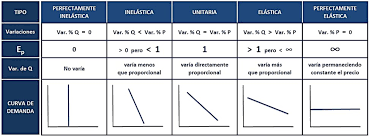

---
#Vayamos a un caso particular 🥑 🥑

In [37]:
Palta_df=pd.read_csv("avocado.csv", sep=";")

In [38]:
Palta_df.head()

,num,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,0,2015-12-27,"1,33","64236,62","1036,74","54454,85","48,16","8696,87","8603,62","93,25",0,conventional,2015,Albany
1,1,1,2015-12-20,"1,35","54876,98","674,28","44638,81","58,33","9505,56","9408,07","97,49",0,conventional,2015,Albany
2,2,2,2015-12-13,"0,93","118220,22","794,7","109149,67","130,5","8145,35","8042,21","103,14",0,conventional,2015,Albany
3,3,3,2015-12-06,"1,08","78992,15",1132,"71976,41","72,58","5811,16","5677,4","133,76",0,conventional,2015,Albany
4,4,4,2015-11-29,"1,28","51039,6","941,48","43838,39","75,78","6183,95","5986,26","197,69",0,conventional,2015,Albany


Una buena practica para ayudarnos de las IA es mandarle los df en formato JSON para que nos ayude a procesar la info, para que nos sirva de copiloto. y a xlsx si lo queremos chusmear nosotros

In [ ]:
# Palta_df.to_json("/content/drive/My Drive/Labo/Material support /avocado.json")
# Palta_df.to_excel("/content/drive/My Drive/Labo/Material support /avocado.xlsx")

In [42]:


# El DataFrame ya tiene las columnas P, Q, R, así que eliminamos la selección de columnas innecesaria
# Eliminar filas con valores NaN si las hay
Palta_df = Palta_df.dropna()

# Convertir las columnas P y Q de strings a números (reemplazando comas por puntos)
Palta_df['P'] = pd.to_numeric(Palta_df['P'].astype(str).str.replace(',', '.'), errors='coerce')
Palta_df['Q'] = pd.to_numeric(Palta_df['Q'].astype(str).str.replace(',', '.'), errors='coerce')

# Eliminar filas con valores NaN después de la conversión
Palta_df = Palta_df.dropna()

# Resetear índice, buena practica para analizar dataframes
Palta_df = Palta_df.reset_index(drop=True)

# Calcular elasticidad arco entre pares consecutivos
elasticidades = [] #lista vacia donde vamos a cargar los dataframes
for i in range(1, len(Palta_df)): # para i en el rango de 1 a todo palta pf, len sirve para contar la cantidad de elementos. recorremos el df
    Q1, Q2 = Palta_df.loc[i-1, 'Q'], Palta_df.loc[i, 'Q'] #fila anterior , fila actual
    P1, P2 = Palta_df.loc[i-1, 'P'], Palta_df.loc[i, 'P']

    # le digo que esa parte del denominador debe ser distinta de 0 y si lo es que ejecute lo de abajo
    if (P2 - P1) != 0:
      Ep = ((Q2 - Q1) / ((Q2 + Q1))) / ((P2 - P1) / ((P2 + P1)))
    else:
      Ep = np.nan # si no pasa la ec anterior nos dice, che deberia haber un numero aca

    elasticidades.append(Ep)

# Nuevo DataFrame con elasticidades
df = Palta_df.iloc[1:].copy()
df['Elasticidad'] = elasticidades

# Mostrar resultados
print(df.head(10))
print("Elasticidad promedio:", df['Elasticidad'].mean())

       P          Q       R  Elasticidad
1   1.35   54876.98  Albany   -10.529375
2   0.93  118220.22  Albany    -1.986533
3   1.08   78992.15  Albany    -2.665432
4   1.28   51039.60  Albany    -2.536612
5   1.26   55979.78  Albany    -5.862516
6   0.99   83453.76  Albany    -1.642000
7   0.98  109428.33  Albany   -26.529111
8   1.02   99811.42  Albany    -2.298060
9   1.07   74338.76  Albany    -6.114017
10  1.12   84843.44  Albany     2.890430
Elasticidad promedio: -1.4136582492233327


Ya tenemos unos numeros ahora fijemosnos el promedio de la elasticidad de cada region.


In [43]:
# agarramos los valores de precios y cantidades
P = Palta_df['P'].values
Q = Palta_df['Q'].values

# Cálculo vectorizado de elasticidad arco, igual que la ecuacion que vimos . similar a un bucle for
delta_Q = (Q[1:] - Q[:-1]) / ((Q[1:] + Q[:-1]) / 2)
delta_P = (P[1:] - P[:-1]) / ((P[1:] + P[:-1]) / 2)

Ep = np.divide(delta_Q, delta_P, where=delta_P != 0)
Ep[delta_P == 0] = np.nan

In [44]:
# repetimos
P = Palta_df['P'].values
Q = Palta_df['Q'].values
R = Palta_df['R'].values

# Calcular elasticidad arco entre pares consecutivos usando vectorización
# Evitar división por cero donde el cambio de precio es cero
delta_Q = (Q[1:] - Q[:-1]) / ((Q[1:] + Q[:-1]) / 2)
delta_P = (P[1:] - P[:-1]) / ((P[1:] + P[:-1]) / 2)

# Calcular Ep solo donde delta_P no es cero
Ep = np.divide(delta_Q, delta_P, out=np.full_like(delta_Q, np.nan), where=delta_P != 0)


# DataFrame temporal con las elasticidades calculadas y las regiones correspondientes
#  el índice de regiones debe coincidir con las elasticidades
df_elasticidades = pd.DataFrame({
    'Region': R[1:], # Las regiones corresponden a los puntos finales de cada par
    'Elasticidad': Ep
})

# Calcular elasticidad promedio por región, ignorando los NaN
elasticidad_por_region = df_elasticidades.groupby('Region')['Elasticidad'].mean().reset_index()
elasticidad_por_region = elasticidad_por_region.rename(columns={'Elasticidad': 'Elasticidad_Promedio'})

# Clasificar el tipo de demanda
elasticidad_por_region['Tipo_Demanda'] = np.where(
    abs(elasticidad_por_region['Elasticidad_Promedio']) > 1,
    'Elástica',
    'Inelástica'
)

# Crear un nuevo DataFrame con los resultados finales
df_resultados_elasticidad = elasticidad_por_region[['Region', 'Elasticidad_Promedio', 'Tipo_Demanda']].copy()

# Mostrar el nuevo DataFrame
display(df_resultados_elasticidad.sort_values('Elasticidad_Promedio'))

# Opcional: Mostrar el resumen por tipo de demanda también en un DataFrame o Series
conteo_tipos = df_resultados_elasticidad['Tipo_Demanda'].value_counts()
print("\nResumen por Tipo de Demanda:")
display(conteo_tipos)

# Opcional: Calcular y mostrar la elasticidad promedio global
elasticidad_promedio_global = df_elasticidades['Elasticidad'].mean()
print(f"\nElasticidad promedio global: {elasticidad_promedio_global:.3f}")

,Region,Elasticidad_Promedio,Tipo_Demanda
5,BuffaloRochester,-3.102439,Elástica
49,Syracuse,-2.844625,Elástica
44,SouthCarolina,-2.415561,Elástica
38,RichmondNorfolk,-2.270204,Elástica
47,Spokane,-2.239201,Elástica
23,Louisville,-2.141603,Elástica
52,West,-2.018310,Elástica
51,TotalUS,-1.974817,Elástica
32,Philadelphia,-1.961489,Elástica
35,Plains,-1.950623,Elástica



Resumen por Tipo de Demanda:


Tipo_Demanda
Elástica      45
Inelástica     9
Name: count, dtype: int64


Elasticidad promedio global: -1.414


3. Elasticidad precio de la demanda:
Relación: Cambio porcentual en cantidad ÷ Cambio porcentual en precio

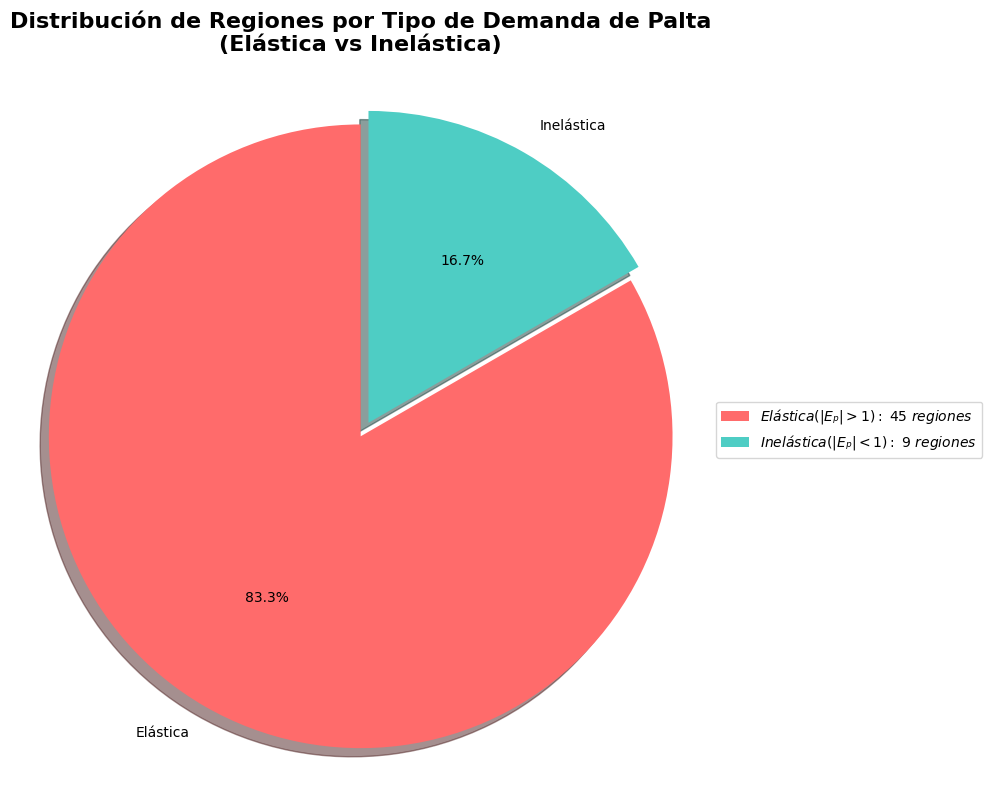

In [45]:
# Calcular la proporción de regiones por tipo de demanda
conteo_tipos = elasticidad_por_region['Tipo_Demanda'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(10, 8))
colores = ['#FF6B6B', '#4ECDC4']  # Rojo para elástica, verde azulado para inelástica
explode = (0.05, 0)  # Resaltar la porción elástica

# Crear el pie chart
plt.pie(conteo_tipos.values,
        labels=conteo_tipos.index,
        autopct='%1.1f%%',
        colors=colores,
        explode=explode,
        shadow=True,
        startangle=90)

# Añadir título
plt.title('Distribución de Regiones por Tipo de Demanda de Palta\n(Elástica vs Inelástica)',
          fontsize=16, fontweight='bold', pad=20)

# Añadir información adicional en la leyenda
elasticas = conteo_tipos.get('Elástica', 0)
inelasticas = conteo_tipos.get('Inelástica', 0)
total_regiones = elasticas + inelasticas

leyenda_info = [
    f'$Elástica (|Eₚ| > 1):$ {elasticas} $regiones$',
    f'$Inelástica (|Eₚ| < 1):$ {inelasticas} $regiones$',
    f'Total: {total_regiones} regiones analizadas'
]

plt.legend(leyenda_info, loc='center left', bbox_to_anchor=(1, 0.5))

# Asegurar que el gráfico sea un círculo perfecto
plt.axis('equal')

plt.tight_layout()
plt.show()
plt.close()


### Resumen del Análisis de Elasticidad de la palta

El análisis de elasticidad precio de la demanda para la palta, con un promedio global de aproximadamente -1.41, indica que la demanda es **elástica** (ya que el valor absoluto, 1.41, es mayor que 1).

Esto significa que los consumidores de palta son **sensibles a los cambios en el precio**. Un cambio porcentual en el precio provoca un cambio porcentual mayor en la cantidad demandada. Esta sensibilidad sugiere fuertemente la existencia de **sustitutos disponibles** a los que los consumidores pueden recurrir si el precio de la palta sube.

Se identifican varios tipos de sustitutos potenciales dependiendo del uso producto:

*   **Como alimento saludable:** Aceite de oliva, semillas, pescado graso.
*   **En ensaladas:** Aceite de oliva con limón, nueces, quesos..

En conclusión, la elasticidad elástica observada confirma que los consumidores responden significativamente a las variaciones de precio, pudiendo optar por sustitutos cuando la palta se vuelve más caro.

Veamos en graficos

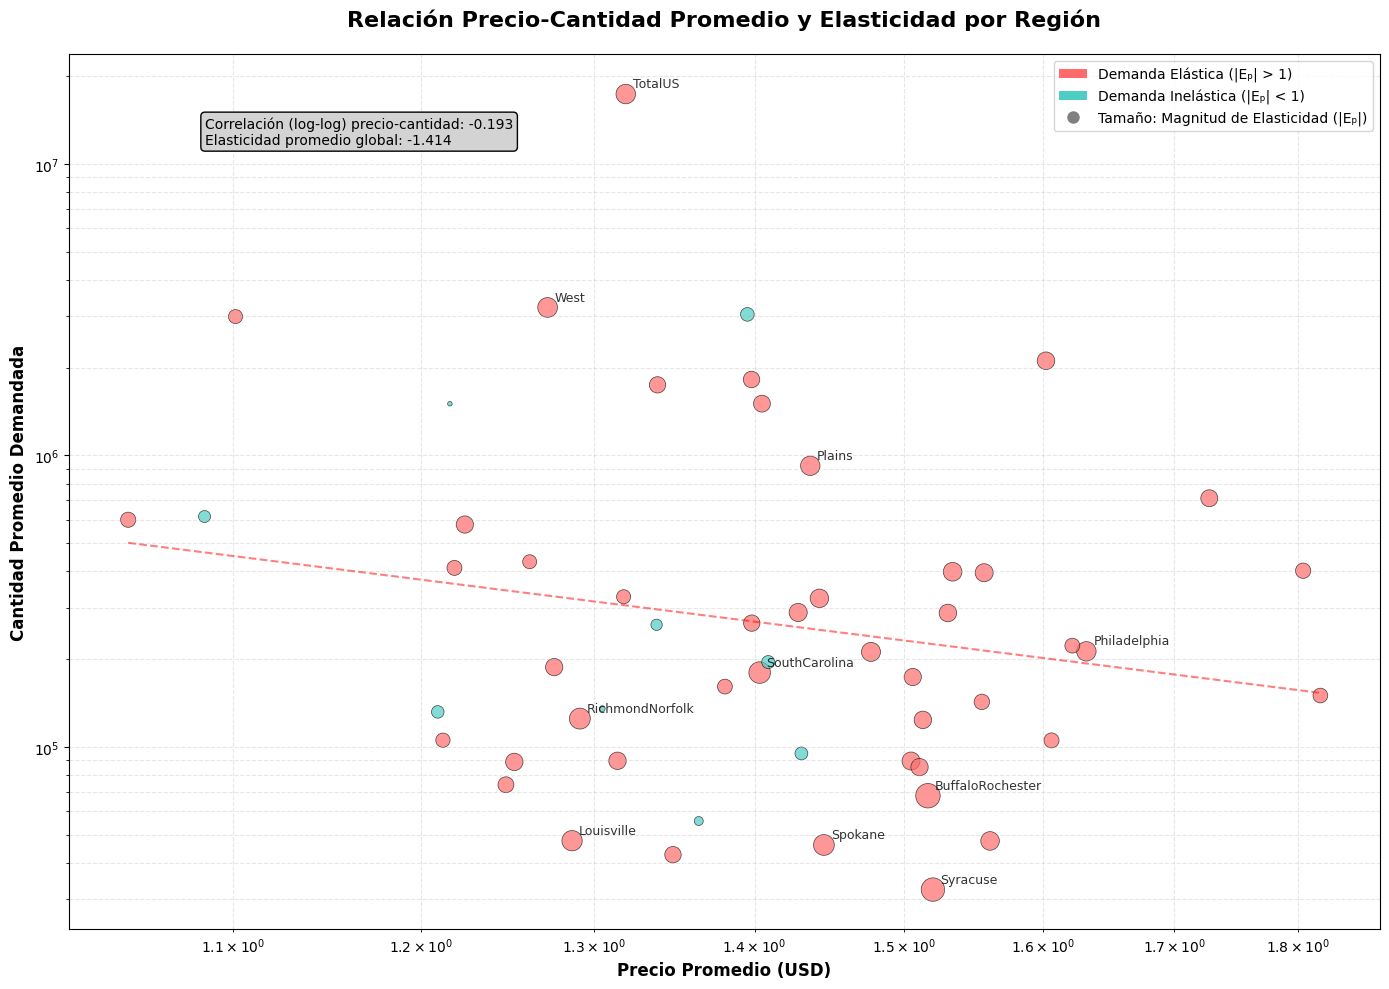

In [46]:
# Calcular precios y cantidades promedio por región para el scatter
precio_promedio = Palta_df.groupby('R')['P'].mean()
cantidad_promedio = Palta_df.groupby('R')['Q'].mean()

# Combinar con las elasticidades promedio por región (calculado previamente en df_resultados_elasticidad)
# Asegurarnos de incluir la columna 'Tipo_Demanda' en scatter_data
scatter_data = pd.DataFrame({
    'Precio_Promedio': precio_promedio,
    'Cantidad_Promedio': cantidad_promedio,
    'Elasticidad': elasticidad_por_region.set_index('Region')['Elasticidad_Promedio']
}).dropna()

# Unir con df_resultados_elasticidad para obtener la columna 'Tipo_Demanda'
scatter_data = scatter_data.merge(
    df_resultados_elasticidad[['Region', 'Tipo_Demanda']],
    left_index=True, right_on='Region', how='left'
).set_index('Region') # Volver a establecer 'Region' como índice si se desea, o usar la columna 'Region' directamente


# Crear el scatter plot
plt.figure(figsize=(14, 10))

# Colores según tipo de demanda (ahora 'Tipo_Demanda' está en scatter_data)
colores = ['#FF6B6B' if row['Tipo_Demanda'] == 'Elástica' else '#4ECDC4' for index, row in scatter_data.iterrows()]
tamanos = np.abs(scatter_data['Elasticidad']) * 100  # Tamaño proporcional a la magnitud de la elasticidad

# Crear scatter plot
scatter = plt.scatter(scatter_data['Precio_Promedio'],
                     scatter_data['Cantidad_Promedio'],
                     c=colores,
                     s=tamanos,
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)

# Añadir etiquetas para algunas regiones destacadas (ej. las 5 con mayor y menor elasticidad en valor absoluto)
# Identificar las regiones con elasticidades más extremas en valor absoluto
scatter_data['Abs_Elasticidad'] = abs(scatter_data['Elasticidad'])
top_bottom_elasticity = scatter_data.sort_values('Abs_Elasticidad', ascending=False).head(10) # Top 10 en valor absoluto

for region, row in top_bottom_elasticity.iterrows():
    plt.annotate(region,
                (row['Precio_Promedio'], row['Cantidad_Promedio']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)


# Calcular y añadir línea de tendencia
if len(scatter_data) > 1:
    # Usar logaritmo para el ajuste lineal si se usó escala logarítmica en los ejes
    if scatter_data['Precio_Promedio'].min() > 0 and scatter_data['Cantidad_Promedio'].min() > 0:
        z = np.polyfit(np.log(scatter_data['Precio_Promedio']), np.log(scatter_data['Cantidad_Promedio']), 1)
        # La ecuación de la tendencia en escala original es Q = exp(z[1]) * P^z[0]
        # Para graficar la línea de tendencia en escala log-log, graficamos la línea en la escala logarítmica
        x_trend = np.linspace(scatter_data['Precio_Promedio'].min(), scatter_data['Precio_Promedio'].max(), 100)
        y_trend = np.exp(z[1]) * (x_trend**z[0])

        plt.plot(x_trend, y_trend, "r--", alpha=0.5, label=f'Tendencia: Q ≈ {np.exp(z[1]):.2f} * P^{z[0]:.2f}')


# Personalizar el gráfico
plt.title('Relación Precio-Cantidad Promedio y Elasticidad por Región',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Precio Promedio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad Promedio Demandada', fontsize=12, fontweight='bold')
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.yscale('log')
plt.grid(True, which="both", alpha=0.3, linestyle='--')

# Añadir leyenda
from matplotlib.patches import Patch
leyenda_elementos = [
    Patch(facecolor='#FF6B6B', label='Demanda Elástica (|Eₚ| > 1)'),
    Patch(facecolor='#4ECDC4', label='Demanda Inelástica (|Eₚ| < 1)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
              markersize=10, label='Tamaño: Magnitud de Elasticidad (|Eₚ|)')
]
plt.legend(handles=leyenda_elementos, loc='best')

# Añadir coeficiente de correlación (en escala logarítmica si se usó para la tendencia)
# Correlación entre los logaritmos
if scatter_data['Precio_Promedio'].min() > 0 and scatter_data['Cantidad_Promedio'].min() > 0:
    correlacion_log = np.corrcoef(np.log(scatter_data['Precio_Promedio']), np.log(scatter_data['Cantidad_Promedio']))[0, 1]
    correlacion_text = f'Correlación (log-log) precio-cantidad: {correlacion_log:.3f}'
else:
    correlacion_text = f'Correlación precio-cantidad: {scatter_data["Precio_Promedio"].corr(scatter_data["Cantidad_Promedio"]):.3f}'


plt.figtext(0.15, 0.85,
           f'{correlacion_text}\n'
           f'Elasticidad promedio global: {df_elasticidades["Elasticidad"].mean():.3f}',
           bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.show()

In [1]:
#@title Easter egg 🥚
from IPython.display import Image
Image(url='https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExbThjMmhzdWhxd3U5YjllZ3drY21pNDJsYnJ4a2x0NGsxNm51Y2Q5cSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lKQ4k6JMgf1OoeIcVf/giphy.gif')